In [37]:
import sys
sys.path.append("..")
import numpy as np
from khepri import Crystal, Drawing

In [ ]:
pw = (1, 1)
wl = 0.8
dslab = 2.5
epsslab = 5-0.09j
Nz = 501

cl = Crystal(pw)
cl.add_layer_uniform("A", epsslab, dslab)
cl.set_device("A", True)
cl.set_source(wl, 1, 0)
cl.solve()

In [61]:
# Total absorption
R, T = cl.poynting_flux_end()
ABS = 1 - R - T

def epsilon_slab(zvals, depth, slab_epsilon):
    epsilon = np.ones(zvals.shape[0], dtype=complex)
    epsilon[(zvals > 0) & (zvals <= depth)] =  slab_epsilon
    return epsilon

# Local absorption function
x = y = np.array([0])
def local_absorption(cl, zvals, depth, slab_epsilon, integrate=True):
    E, _ = cl.fields_volume(x, y, zvals)
    epsilon = epsilon_slab(zvals, depth, slab_epsilon)

    E2 = np.sum(np.power(np.abs(E), 2), axis=1).ravel() 
    LABS = - 0.5 * E2 * np.imag(epsilon) / wl
    if not integrate:
        return LABS, E2
    ILABS =  np.sum(LABS) * depth / np.count_nonzero(np.imag(epsilon))#np.mean(LABS) 
    return ILABS




ILABS=np.float64(0.6193517346677958), ABS=np.float64(0.6224140109359826), rel. err. [%] -0.49


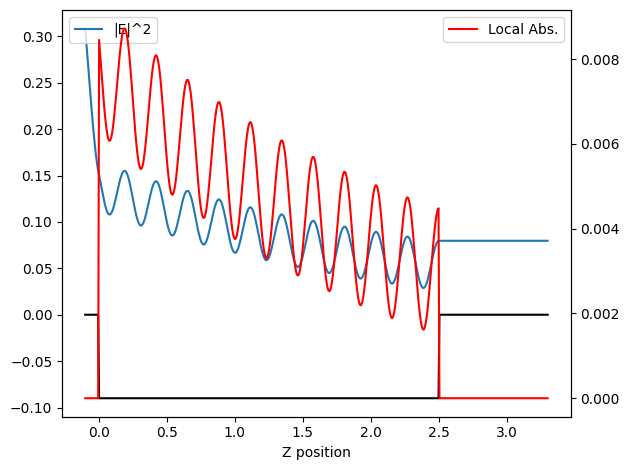

In [62]:

zvals =  np.linspace(-0.1, dslab+1*wl, Nz)
ILDOS = local_absorption(cl, zvals, dslab, epsslab)
LABS, E2 = local_absorption(cl, zvals, dslab, epsslab, integrate=False)
ILABS = 50 * local_absorption(cl, zvals, dslab, epsslab)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(zvals, E2, label='|E|^2')
ax.plot(zvals, epsilon_slab(zvals, dslab, epsslab).imag, 'k-')
plt.legend(loc="upper left")
ax.twinx().plot(zvals, LABS, 'r-', label="Local Abs.")
plt.legend(loc="upper right")
ax.set_xlabel("Z position")
plt.tight_layout()
print(f"{ILABS=}, {ABS=}, rel. err. [%] {round((ILABS-ABS)/ABS*100, 2)}")

In [31]:
CHART = []
resolution_sweep = np.arange(5, 400, 5)
for Nz in resolution_sweep:
    
    zvals =  np.linspace(-0.1, dslab+1*wl, Nz)
    ILABS = local_absorption(cl, zvals, dslab, epsslab)
    CHART.append(ILABS)

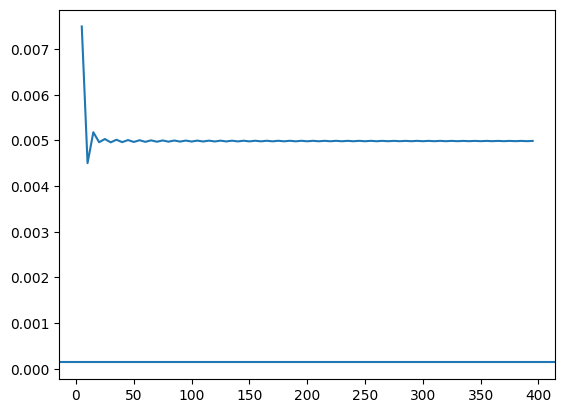

In [32]:
plt.plot(resolution_sweep, CHART)
plt.axhline(ABS/900)

In [65]:
CHART = []
depth_sweep = np.linspace(0.1, 3.3, 101)
Nz = 501
for depth in depth_sweep:
    cl = Crystal(pw)
    cl.add_layer_uniform("A", epsslab, depth)
    cl.set_device("A", True)
    cl.set_source(wl, 1, 0)
    cl.solve()
    R, T = cl.poynting_flux_end()
    ABS = 1 - R - T
    zvals =  np.linspace(0.001, depth+0.3, Nz)
    ILABS = 50 *local_absorption(cl, zvals, depth, epsslab) 
    CHART.append((ILABS)/ABS) 

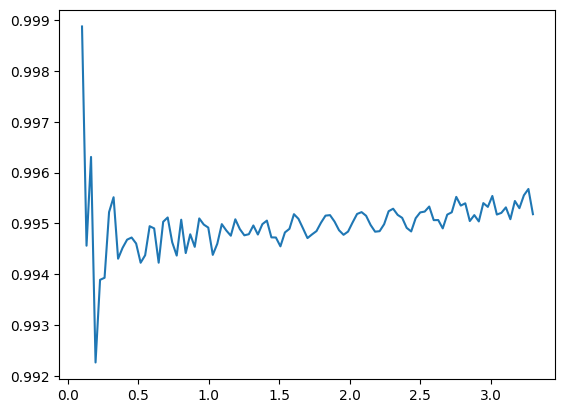

In [66]:
plt.plot(depth_sweep, CHART)
